# Mount my drive:

In [0]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2')
!ls

config.py   distributions  README.md	     trained_models
data	    experiments    requirements.txt  utils
DataLoader  __pycache__    results	     visualize


# Import:

In [0]:
import torch
from torch import nn
from torch.optim import SGD
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision.transforms import Compose, ToTensor, Normalize
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

from utils.models import get_my_model_MNIST, fetch_last_checkpoint_model_filename
from DataLoader.dataLoaders import get_mnist_dataloaders
from utils.training import run, evaluate
from utils.functions import Hardsigmoid

# Dataset:

In [0]:
batch_size_train = 64
batch_size_test = 1000
# Dataset
train_loader, valid_loader, test_loader, classes = get_mnist_dataloaders(batch_size_train, batch_size_test)

Number of validation examples: 6000
Number of training examples: 844
Number of testing examples: 10


# Training:

In [0]:
!pip install pytorch-ignite

In [0]:
try:
  from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
  from ignite.metrics import Accuracy, Loss, ConfusionMatrix
  from ignite.handlers import ModelCheckpoint
except ImportError:
  raise RuntimeError("no module Ignite, to install Ignite: 'pip install pytorch-ignite'.")

from tqdm import tqdm

## Training parameters:

In [0]:
epochs = 30
lr = 0.01
momentum = 0.5
log_interval = 10  # how many batches to wait before logging training status
criterion =  F.nll_loss

## Run No binary network:

In [0]:
# parameters model to load no Binary model
binary = False

model, name_model = get_my_model_MNIST(binary)
print(name_model)

NonBinaryNet


ITERATION - loss: 1.25: 100%|█████████▉| 840/844 [00:15<00:00, 91.75it/s]

Training Results - Epoch: 1  Avg accuracy: 79.73 Avg loss: 1.17


ITERATION - loss: 1.19:   2%|▏         | 20/844 [00:17<02:28,  5.55it/s]

Validation Results - Epoch: 1  Avg accuracy: 79.50 Avg loss: 1.16


ITERATION - loss: 0.78: 100%|█████████▉| 840/844 [00:32<00:00, 99.50it/s]

Training Results - Epoch: 2  Avg accuracy: 84.78 Avg loss: 0.78


ITERATION - loss: 0.75:   2%|▏         | 20/844 [00:33<02:25,  5.66it/s]

Validation Results - Epoch: 2  Avg accuracy: 84.83 Avg loss: 0.78


ITERATION - loss: 0.69: 850it [00:49, 94.39it/s]

Training Results - Epoch: 3  Avg accuracy: 86.68 Avg loss: 0.62


ITERATION - loss: 0.63:   1%|          | 10/844 [00:50<03:25,  4.05it/s]

Validation Results - Epoch: 3  Avg accuracy: 87.17 Avg loss: 0.62


ITERATION - loss: 0.55: 100%|█████████▉| 840/844 [01:07<00:00, 86.63it/s]

Training Results - Epoch: 4  Avg accuracy: 88.15 Avg loss: 0.53


ITERATION - loss: 0.56:   2%|▏         | 20/844 [01:08<02:37,  5.24it/s]

Validation Results - Epoch: 4  Avg accuracy: 88.42 Avg loss: 0.52


ITERATION - loss: 0.57: 850it [01:25, 90.06it/s]

Training Results - Epoch: 5  Avg accuracy: 88.99 Avg loss: 0.47


ITERATION - loss: 0.46:   1%|          | 10/844 [01:26<03:45,  3.70it/s]

Validation Results - Epoch: 5  Avg accuracy: 89.18 Avg loss: 0.46


ITERATION - loss: 0.53: 100%|█████████▉| 840/844 [01:43<00:00, 84.09it/s]

Training Results - Epoch: 6  Avg accuracy: 90.15 Avg loss: 0.42


ITERATION - loss: 0.41:   1%|          | 10/844 [01:44<03:50,  3.62it/s] 

Validation Results - Epoch: 6  Avg accuracy: 90.50 Avg loss: 0.42


ITERATION - loss: 0.37: 100%|█████████▉| 840/844 [02:02<00:00, 87.64it/s]

Training Results - Epoch: 7  Avg accuracy: 90.96 Avg loss: 0.39


ITERATION - loss: 0.40:   2%|▏         | 20/844 [02:03<02:43,  5.03it/s]

Validation Results - Epoch: 7  Avg accuracy: 91.18 Avg loss: 0.38


ITERATION - loss: 0.33: 850it [02:20, 88.66it/s]

Training Results - Epoch: 8  Avg accuracy: 91.54 Avg loss: 0.36


ITERATION - loss: 0.30:   1%|          | 10/844 [02:21<03:45,  3.69it/s]

Validation Results - Epoch: 8  Avg accuracy: 91.87 Avg loss: 0.35


ITERATION - loss: 0.20: 100%|█████████▉| 840/844 [02:38<00:00, 91.58it/s]

Training Results - Epoch: 9  Avg accuracy: 92.00 Avg loss: 0.33


ITERATION - loss: 0.27:   2%|▏         | 20/844 [02:39<02:39,  5.16it/s]

Validation Results - Epoch: 9  Avg accuracy: 92.52 Avg loss: 0.33


ITERATION - loss: 0.23: 850it [02:57, 85.29it/s]

Training Results - Epoch: 10  Avg accuracy: 92.58 Avg loss: 0.31


ITERATION - loss: 0.24:   1%|          | 10/844 [02:58<03:54,  3.56it/s]

Validation Results - Epoch: 10  Avg accuracy: 93.05 Avg loss: 0.31


ITERATION - loss: 0.22: 100%|█████████▉| 840/844 [03:16<00:00, 84.66it/s]

Training Results - Epoch: 11  Avg accuracy: 92.96 Avg loss: 0.29


ITERATION - loss: 0.39:   1%|          | 10/844 [03:17<03:53,  3.57it/s] 

Validation Results - Epoch: 11  Avg accuracy: 93.35 Avg loss: 0.29


ITERATION - loss: 0.40: 100%|█████████▉| 840/844 [03:34<00:00, 84.03it/s]

Training Results - Epoch: 12  Avg accuracy: 93.30 Avg loss: 0.28


ITERATION - loss: 0.27:   2%|▏         | 20/844 [03:36<02:45,  4.99it/s]

Validation Results - Epoch: 12  Avg accuracy: 93.52 Avg loss: 0.27


ITERATION - loss: 0.30: 850it [03:53, 90.31it/s]

Training Results - Epoch: 13  Avg accuracy: 93.76 Avg loss: 0.26


ITERATION - loss: 0.32:   1%|          | 10/844 [03:54<03:45,  3.69it/s]

Validation Results - Epoch: 13  Avg accuracy: 94.02 Avg loss: 0.26


ITERATION - loss: 0.24: 100%|█████████▉| 840/844 [04:11<00:00, 90.57it/s]

Training Results - Epoch: 14  Avg accuracy: 94.01 Avg loss: 0.25


ITERATION - loss: 0.23:   2%|▏         | 20/844 [04:12<02:38,  5.21it/s]

Validation Results - Epoch: 14  Avg accuracy: 94.22 Avg loss: 0.25


ITERATION - loss: 0.19: 850it [04:29, 93.38it/s]

Training Results - Epoch: 15  Avg accuracy: 94.27 Avg loss: 0.24


ITERATION - loss: 0.24:   1%|          | 10/844 [04:30<03:35,  3.87it/s]

Validation Results - Epoch: 15  Avg accuracy: 94.33 Avg loss: 0.24


ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [04:46<00:00, 91.69it/s]

Training Results - Epoch: 16  Avg accuracy: 94.56 Avg loss: 0.23


ITERATION - loss: 0.23:   2%|▏         | 20/844 [04:47<02:32,  5.41it/s]

Validation Results - Epoch: 16  Avg accuracy: 94.53 Avg loss: 0.22


ITERATION - loss: 0.28: 100%|█████████▉| 840/844 [05:04<00:00, 89.44it/s]

Training Results - Epoch: 17  Avg accuracy: 94.70 Avg loss: 0.22


ITERATION - loss: 0.21:   2%|▏         | 20/844 [05:05<02:35,  5.30it/s]

Validation Results - Epoch: 17  Avg accuracy: 94.78 Avg loss: 0.22


ITERATION - loss: 0.16: 850it [05:21, 92.13it/s]

Training Results - Epoch: 18  Avg accuracy: 94.91 Avg loss: 0.21


ITERATION - loss: 0.27:   1%|          | 10/844 [05:22<03:38,  3.82it/s]

Validation Results - Epoch: 18  Avg accuracy: 95.00 Avg loss: 0.21


ITERATION - loss: 0.17: 100%|█████████▉| 840/844 [05:39<00:00, 93.56it/s]

Training Results - Epoch: 19  Avg accuracy: 95.06 Avg loss: 0.20


ITERATION - loss: 0.20:   2%|▏         | 20/844 [05:40<02:32,  5.41it/s]

Validation Results - Epoch: 19  Avg accuracy: 95.07 Avg loss: 0.20


ITERATION - loss: 0.24: 850it [05:57, 90.36it/s]

Training Results - Epoch: 20  Avg accuracy: 95.29 Avg loss: 0.20


ITERATION - loss: 0.11:   1%|          | 10/844 [05:58<03:36,  3.85it/s]

Validation Results - Epoch: 20  Avg accuracy: 95.25 Avg loss: 0.19


ITERATION - loss: 0.22: 100%|█████████▉| 840/844 [06:14<00:00, 91.21it/s]

Training Results - Epoch: 21  Avg accuracy: 95.40 Avg loss: 0.19


ITERATION - loss: 0.25:   2%|▏         | 20/844 [06:15<02:30,  5.48it/s]

Validation Results - Epoch: 21  Avg accuracy: 95.37 Avg loss: 0.19


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [06:31<00:00, 92.76it/s]

Training Results - Epoch: 22  Avg accuracy: 95.58 Avg loss: 0.18


ITERATION - loss: 0.18:   2%|▏         | 20/844 [06:32<02:28,  5.54it/s]

Validation Results - Epoch: 22  Avg accuracy: 95.57 Avg loss: 0.18


ITERATION - loss: 0.33: 850it [06:49, 95.42it/s]

Training Results - Epoch: 23  Avg accuracy: 95.64 Avg loss: 0.18


ITERATION - loss: 0.21:   1%|          | 10/844 [06:50<03:38,  3.82it/s]

Validation Results - Epoch: 23  Avg accuracy: 95.65 Avg loss: 0.18


ITERATION - loss: 0.17: 100%|█████████▉| 840/844 [07:06<00:00, 89.22it/s]

Training Results - Epoch: 24  Avg accuracy: 95.79 Avg loss: 0.17


ITERATION - loss: 0.24:   2%|▏         | 20/844 [07:07<02:31,  5.43it/s]

Validation Results - Epoch: 24  Avg accuracy: 95.70 Avg loss: 0.17


ITERATION - loss: 0.21: 850it [07:24, 86.68it/s]

Training Results - Epoch: 25  Avg accuracy: 95.93 Avg loss: 0.17


ITERATION - loss: 0.23:   1%|          | 10/844 [07:25<03:41,  3.77it/s]

Validation Results - Epoch: 25  Avg accuracy: 95.75 Avg loss: 0.17


ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [07:42<00:00, 91.83it/s]

Training Results - Epoch: 26  Avg accuracy: 95.96 Avg loss: 0.16


ITERATION - loss: 0.15:   1%|          | 10/844 [07:42<03:39,  3.81it/s] 

Validation Results - Epoch: 26  Avg accuracy: 96.00 Avg loss: 0.16


ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [07:59<00:00, 92.32it/s]

Training Results - Epoch: 27  Avg accuracy: 96.10 Avg loss: 0.16


ITERATION - loss: 0.10:   2%|▏         | 20/844 [08:00<02:33,  5.37it/s]

Validation Results - Epoch: 27  Avg accuracy: 96.03 Avg loss: 0.16


ITERATION - loss: 0.13: 850it [08:17, 93.72it/s]

Training Results - Epoch: 28  Avg accuracy: 96.14 Avg loss: 0.16


ITERATION - loss: 0.23:   1%|          | 10/844 [08:18<03:36,  3.86it/s]

Validation Results - Epoch: 28  Avg accuracy: 96.08 Avg loss: 0.16


ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [08:34<00:00, 93.25it/s]

Training Results - Epoch: 29  Avg accuracy: 96.22 Avg loss: 0.15


ITERATION - loss: 0.19:   2%|▏         | 20/844 [08:35<02:32,  5.42it/s]

Validation Results - Epoch: 29  Avg accuracy: 96.07 Avg loss: 0.15


ITERATION - loss: 0.07: 850it [08:52, 94.74it/s]

Training Results - Epoch: 30  Avg accuracy: 96.28 Avg loss: 0.15


ITERATION - loss: 0.11:   1%|          | 10/844 [08:53<03:40,  3.78it/s]

Validation Results - Epoch: 30  Avg accuracy: 96.22 Avg loss: 0.15


ITERATION - loss: 0.23: 100%|█████████▉| 840/844 [09:10<00:00, 91.06it/s]

Training Results - Epoch: 31  Avg accuracy: 96.41 Avg loss: 0.15


ITERATION - loss: 0.06:   2%|▏         | 20/844 [09:11<02:34,  5.34it/s]

Validation Results - Epoch: 31  Avg accuracy: 96.23 Avg loss: 0.15


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [09:27<00:00, 94.12it/s]

Training Results - Epoch: 32  Avg accuracy: 96.51 Avg loss: 0.14


ITERATION - loss: 0.06:   2%|▏         | 20/844 [09:28<02:32,  5.39it/s]

Validation Results - Epoch: 32  Avg accuracy: 96.35 Avg loss: 0.14


ITERATION - loss: 0.10: 850it [09:45, 87.32it/s]

Training Results - Epoch: 33  Avg accuracy: 96.51 Avg loss: 0.14


ITERATION - loss: 0.18:   1%|          | 10/844 [09:46<03:38,  3.82it/s]

Validation Results - Epoch: 33  Avg accuracy: 96.45 Avg loss: 0.14


ITERATION - loss: 0.19: 100%|█████████▉| 840/844 [10:02<00:00, 87.94it/s]

Training Results - Epoch: 34  Avg accuracy: 96.58 Avg loss: 0.14


ITERATION - loss: 0.21:   2%|▏         | 20/844 [10:03<02:31,  5.44it/s]

Validation Results - Epoch: 34  Avg accuracy: 96.50 Avg loss: 0.14


ITERATION - loss: 0.11: 850it [10:20, 92.50it/s]

Training Results - Epoch: 35  Avg accuracy: 96.62 Avg loss: 0.13


ITERATION - loss: 0.11:   1%|          | 10/844 [10:21<03:42,  3.75it/s]

Validation Results - Epoch: 35  Avg accuracy: 96.52 Avg loss: 0.14


ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [10:38<00:00, 92.79it/s]

Training Results - Epoch: 36  Avg accuracy: 96.71 Avg loss: 0.13


ITERATION - loss: 0.13:   2%|▏         | 20/844 [10:39<02:36,  5.26it/s]

Validation Results - Epoch: 36  Avg accuracy: 96.62 Avg loss: 0.13


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [10:56<00:00, 88.54it/s]

Training Results - Epoch: 37  Avg accuracy: 96.77 Avg loss: 0.13


ITERATION - loss: 0.20:   2%|▏         | 20/844 [10:57<02:37,  5.25it/s]

Validation Results - Epoch: 37  Avg accuracy: 96.80 Avg loss: 0.13


ITERATION - loss: 0.19: 850it [11:14, 89.22it/s]

Training Results - Epoch: 38  Avg accuracy: 96.82 Avg loss: 0.13


ITERATION - loss: 0.06:   1%|          | 10/844 [11:15<03:37,  3.84it/s]

Validation Results - Epoch: 38  Avg accuracy: 96.67 Avg loss: 0.13


ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [11:32<00:00, 94.15it/s]

Training Results - Epoch: 39  Avg accuracy: 96.87 Avg loss: 0.13


ITERATION - loss: 0.11:   2%|▏         | 20/844 [11:33<02:34,  5.33it/s]

Validation Results - Epoch: 39  Avg accuracy: 96.75 Avg loss: 0.13


ITERATION - loss: 0.16: 850it [11:49, 92.58it/s]

Training Results - Epoch: 40  Avg accuracy: 96.89 Avg loss: 0.12


ITERATION - loss: 0.16: 850it [11:50, 92.58it/s]

Validation Results - Epoch: 40  Avg accuracy: 96.85 Avg loss: 0.13


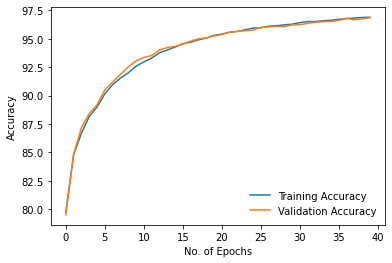

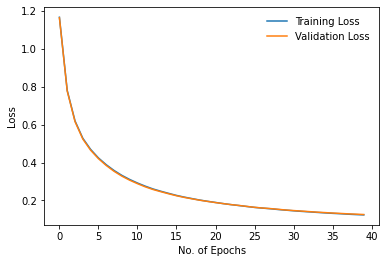

In [0]:
path_model_checkpoint = 'trained_models/MNIST/No_binary_models/'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test no binary network:

In [0]:
# load model pre trained
path_model = 'trained_models/MNIST/No_binary_models/'
model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
print("Model Loaded")

Model Loaded


In [0]:
evaluate(model, test_loader)

Test Results - Avg accuracy: 96.91 Avg loss: 0.12


## Run Binary Netwwork:

In [0]:
# parameters model to load no Binary model
binary = True

model, name_model = get_my_model_MNIST(binary)
print(name_model)

Stochastic_ST_first_conv_binary


ITERATION - loss: 0.34: 100%|█████████▉| 840/844 [00:16<00:00, 95.65it/s]

Training Results - Epoch: 1  Avg accuracy: 87.21 Avg loss: 0.47


ITERATION - loss: 0.43:   1%|          | 10/844 [00:17<03:35,  3.88it/s] 

Validation Results - Epoch: 1  Avg accuracy: 87.65 Avg loss: 0.46


ITERATION - loss: 0.35: 100%|█████████▉| 840/844 [00:33<00:00, 91.64it/s]

Training Results - Epoch: 2  Avg accuracy: 89.52 Avg loss: 0.37


ITERATION - loss: 0.36:   2%|▏         | 20/844 [00:34<02:31,  5.44it/s]

Validation Results - Epoch: 2  Avg accuracy: 89.87 Avg loss: 0.36


ITERATION - loss: 0.22: 850it [00:51, 87.80it/s]

Training Results - Epoch: 3  Avg accuracy: 91.08 Avg loss: 0.31


ITERATION - loss: 0.28:   1%|          | 10/844 [00:52<03:37,  3.84it/s]

Validation Results - Epoch: 3  Avg accuracy: 91.75 Avg loss: 0.29


ITERATION - loss: 0.52: 100%|█████████▉| 840/844 [01:09<00:00, 92.56it/s]

Training Results - Epoch: 4  Avg accuracy: 92.59 Avg loss: 0.26


ITERATION - loss: 0.39:   2%|▏         | 20/844 [01:10<02:31,  5.44it/s]

Validation Results - Epoch: 4  Avg accuracy: 93.22 Avg loss: 0.25


ITERATION - loss: 0.28: 850it [01:26, 96.35it/s]

Training Results - Epoch: 5  Avg accuracy: 93.47 Avg loss: 0.23


ITERATION - loss: 0.14:   1%|          | 10/844 [01:27<03:30,  3.96it/s]

Validation Results - Epoch: 5  Avg accuracy: 93.97 Avg loss: 0.22


ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [01:43<00:00, 95.76it/s]

Training Results - Epoch: 6  Avg accuracy: 94.32 Avg loss: 0.20


ITERATION - loss: 0.16:   1%|          | 10/844 [01:43<03:30,  3.96it/s] 

Validation Results - Epoch: 6  Avg accuracy: 94.75 Avg loss: 0.19


ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [02:00<00:00, 92.30it/s]

Training Results - Epoch: 7  Avg accuracy: 94.68 Avg loss: 0.19


ITERATION - loss: 0.14:   2%|▏         | 20/844 [02:01<02:30,  5.47it/s]

Validation Results - Epoch: 7  Avg accuracy: 95.27 Avg loss: 0.18


ITERATION - loss: 0.16: 850it [02:17, 93.74it/s]

Training Results - Epoch: 8  Avg accuracy: 95.16 Avg loss: 0.17


ITERATION - loss: 0.28:   1%|          | 10/844 [02:18<03:31,  3.95it/s]

Validation Results - Epoch: 8  Avg accuracy: 95.63 Avg loss: 0.16


ITERATION - loss: 0.20: 100%|█████████▉| 840/844 [02:34<00:00, 94.84it/s]

Training Results - Epoch: 9  Avg accuracy: 95.52 Avg loss: 0.16


ITERATION - loss: 0.13:   2%|▏         | 20/844 [02:35<02:28,  5.54it/s]

Validation Results - Epoch: 9  Avg accuracy: 95.73 Avg loss: 0.15


ITERATION - loss: 0.34: 850it [02:51, 94.10it/s]

Training Results - Epoch: 10  Avg accuracy: 95.73 Avg loss: 0.15


ITERATION - loss: 0.29:   1%|          | 10/844 [02:52<03:37,  3.83it/s]

Validation Results - Epoch: 10  Avg accuracy: 96.08 Avg loss: 0.14


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [03:08<00:00, 94.34it/s]

Training Results - Epoch: 11  Avg accuracy: 96.04 Avg loss: 0.14


ITERATION - loss: 0.25:   2%|▏         | 20/844 [03:09<02:28,  5.55it/s]

Validation Results - Epoch: 11  Avg accuracy: 96.35 Avg loss: 0.13


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [03:25<00:00, 97.32it/s]

Training Results - Epoch: 12  Avg accuracy: 96.12 Avg loss: 0.14


ITERATION - loss: 0.07:   2%|▏         | 20/844 [03:26<02:31,  5.43it/s]

Validation Results - Epoch: 12  Avg accuracy: 96.18 Avg loss: 0.14


ITERATION - loss: 0.12: 850it [03:43, 97.50it/s]

Training Results - Epoch: 13  Avg accuracy: 96.37 Avg loss: 0.13


ITERATION - loss: 0.10:   1%|          | 10/844 [03:44<03:30,  3.96it/s]

Validation Results - Epoch: 13  Avg accuracy: 96.47 Avg loss: 0.13


ITERATION - loss: 0.14: 100%|█████████▉| 840/844 [04:00<00:00, 96.07it/s]

Training Results - Epoch: 14  Avg accuracy: 96.46 Avg loss: 0.12


ITERATION - loss: 0.06:   2%|▏         | 20/844 [04:01<02:28,  5.56it/s]

Validation Results - Epoch: 14  Avg accuracy: 96.68 Avg loss: 0.12


ITERATION - loss: 0.08: 850it [04:17, 91.48it/s]

Training Results - Epoch: 15  Avg accuracy: 96.63 Avg loss: 0.12


ITERATION - loss: 0.09:   1%|          | 10/844 [04:18<03:32,  3.92it/s]

Validation Results - Epoch: 15  Avg accuracy: 96.67 Avg loss: 0.12


ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [04:34<00:00, 95.00it/s]

Training Results - Epoch: 16  Avg accuracy: 96.75 Avg loss: 0.12


ITERATION - loss: 0.14:   2%|▏         | 20/844 [04:35<02:27,  5.58it/s]

Validation Results - Epoch: 16  Avg accuracy: 96.78 Avg loss: 0.12


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [04:50<00:00, 92.39it/s]

Training Results - Epoch: 17  Avg accuracy: 96.80 Avg loss: 0.11


ITERATION - loss: 0.04:   2%|▏         | 20/844 [04:51<02:29,  5.53it/s]

Validation Results - Epoch: 17  Avg accuracy: 96.90 Avg loss: 0.11


ITERATION - loss: 0.20: 850it [05:07, 93.89it/s]

Training Results - Epoch: 18  Avg accuracy: 96.83 Avg loss: 0.11


ITERATION - loss: 0.06:   1%|          | 10/844 [05:08<03:28,  3.99it/s]

Validation Results - Epoch: 18  Avg accuracy: 96.92 Avg loss: 0.11


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [05:24<00:00, 98.02it/s]

Training Results - Epoch: 19  Avg accuracy: 97.06 Avg loss: 0.10


ITERATION - loss: 0.13:   2%|▏         | 20/844 [05:25<02:25,  5.65it/s]

Validation Results - Epoch: 19  Avg accuracy: 96.97 Avg loss: 0.11


ITERATION - loss: 0.09: 850it [05:41, 94.97it/s]

Training Results - Epoch: 20  Avg accuracy: 97.02 Avg loss: 0.10


ITERATION - loss: 0.17:   1%|          | 10/844 [05:41<03:26,  4.03it/s]

Validation Results - Epoch: 20  Avg accuracy: 96.90 Avg loss: 0.11


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [05:57<00:00, 98.03it/s]

Training Results - Epoch: 21  Avg accuracy: 97.23 Avg loss: 0.10


ITERATION - loss: 0.17:   1%|          | 10/844 [05:58<03:24,  4.07it/s] 

Validation Results - Epoch: 21  Avg accuracy: 97.07 Avg loss: 0.10


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [06:14<00:00, 96.96it/s]

Training Results - Epoch: 22  Avg accuracy: 97.17 Avg loss: 0.10


ITERATION - loss: 0.16:   2%|▏         | 20/844 [06:15<02:28,  5.53it/s]

Validation Results - Epoch: 22  Avg accuracy: 97.13 Avg loss: 0.10


ITERATION - loss: 0.11: 850it [06:30, 96.09it/s]

Training Results - Epoch: 23  Avg accuracy: 97.30 Avg loss: 0.10


ITERATION - loss: 0.05:   1%|          | 10/844 [06:31<03:21,  4.13it/s]

Validation Results - Epoch: 23  Avg accuracy: 97.13 Avg loss: 0.10


ITERATION - loss: 0.17: 100%|█████████▉| 840/844 [06:46<00:00, 98.39it/s]

Training Results - Epoch: 24  Avg accuracy: 97.28 Avg loss: 0.10


ITERATION - loss: 0.13:   1%|          | 10/844 [06:47<03:23,  4.09it/s] 

Validation Results - Epoch: 24  Avg accuracy: 97.02 Avg loss: 0.10


ITERATION - loss: 0.04: 850it [07:02, 102.29it/s]

Training Results - Epoch: 25  Avg accuracy: 97.34 Avg loss: 0.09


ITERATION - loss: 0.04: 850it [07:03, 102.29it/s]

Validation Results - Epoch: 25  Avg accuracy: 97.15 Avg loss: 0.09


ITERATION - loss: 0.21: 100%|█████████▉| 840/844 [07:18<00:00, 101.89it/s]

Training Results - Epoch: 26  Avg accuracy: 97.39 Avg loss: 0.09


ITERATION - loss: 0.17:   2%|▏         | 20/844 [07:19<01:41,  8.12it/s]  

Validation Results - Epoch: 26  Avg accuracy: 97.25 Avg loss: 0.10


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [07:34<00:00, 99.02it/s]

Training Results - Epoch: 27  Avg accuracy: 97.53 Avg loss: 0.09


ITERATION - loss: 0.05:   1%|          | 10/844 [07:35<03:21,  4.14it/s] 

Validation Results - Epoch: 27  Avg accuracy: 97.20 Avg loss: 0.09


ITERATION - loss: 0.02: 850it [07:50, 101.58it/s]

Training Results - Epoch: 28  Avg accuracy: 97.41 Avg loss: 0.09


ITERATION - loss: 0.02: 850it [07:51, 101.58it/s]

Validation Results - Epoch: 28  Avg accuracy: 97.17 Avg loss: 0.10


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [08:06<00:00, 96.93it/s]

Training Results - Epoch: 29  Avg accuracy: 97.54 Avg loss: 0.09


ITERATION - loss: 0.04:   2%|▏         | 20/844 [08:07<02:22,  5.77it/s]

Validation Results - Epoch: 29  Avg accuracy: 97.30 Avg loss: 0.09


ITERATION - loss: 0.23: 850it [08:22, 100.17it/s]

Training Results - Epoch: 30  Avg accuracy: 97.63 Avg loss: 0.08


ITERATION - loss: 0.23: 850it [08:23, 100.17it/s]

Validation Results - Epoch: 30  Avg accuracy: 97.32 Avg loss: 0.09


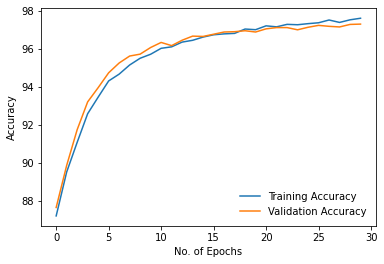

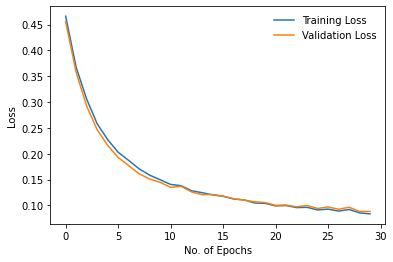

In [0]:
path_model_checkpoint = 'trained_models/MNIST/Binary_models/'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test Binary network:

In [0]:
# load model pre trained
path_model = 'trained_models/MNIST/Binary_models/'
model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
print("Model Loaded")

Model Loaded


In [0]:
evaluate(model, test_loader)

Test Results - Avg accuracy: 97.50 Avg loss: 0.08


# Visualization:

In [0]:
from visualize.viz import visTensor, get_activation, viz_activations, viz_filters
from visualize.viz import viz_heatmap,test_predict_few_examples, standardize_and_clip, format_for_plotting
from visualize.viz import apply_transforms

## Load model:

In [0]:
# load model pre trained no binary
binary = False
model_no_binary, name_model = get_my_model_MNIST(binary)

path_model = 'trained_models/MNIST/No_binary_models/'
if torch.cuda.is_available():
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_NonBinaryNet


In [0]:
# load model pre trained binary
binary = True    
model_binary, name_model = get_my_model_MNIST(binary)

path_model = 'trained_models/MNIST/Binary_models/'
if torch.cuda.is_available():
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_Stochastic_ST_first_conv_binary


## Visualization few predictions:

No binary model


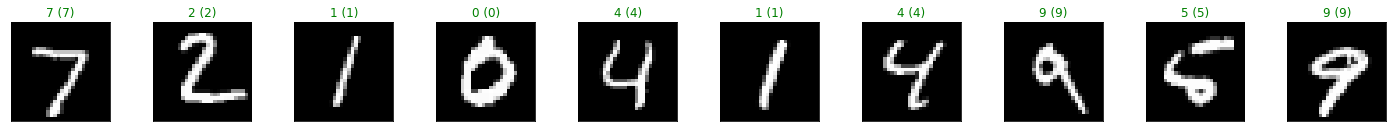

Binary model


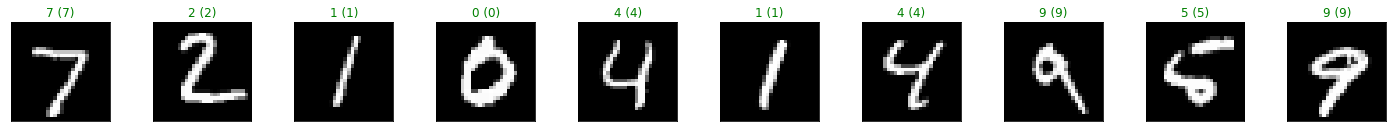

In [0]:
print('No binary model')
test_predict_few_examples(model_no_binary, test_loader)
plt.show()
print('Binary model')
test_predict_few_examples(model_binary, test_loader)
plt.show()

## Visualization Activations values for a specific data:

act_layer1 for label 0


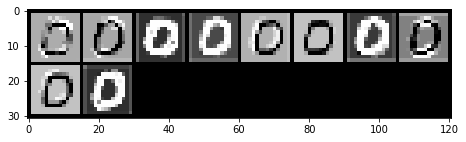

act_layer2 for label 0


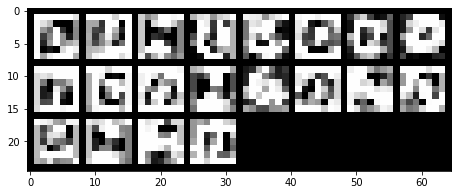

In [0]:
index_data = 10
viz_activations(model_no_binary, test_loader, index_data)

act_layer1.act for label 0


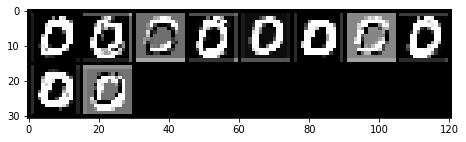

act_layer2 for label 0


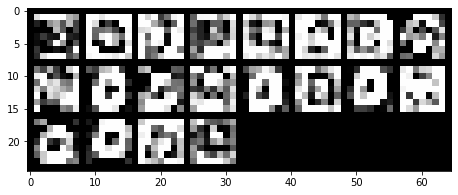

In [0]:
index_data = 10
viz_activations(model_binary, test_loader, index_data)

## Visualization heatmap for a specific data:


layer:act_layer1 :heatrmap for an image of label 0 with model MNIST_Stochastic_ST_first_conv_binary


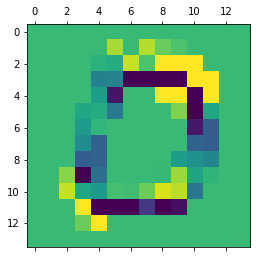

layer:act_layer2 :heatrmap for an image of label 0 with model MNIST_Stochastic_ST_first_conv_binary


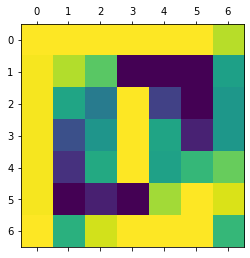

In [0]:
index_data = 10
viz_heatmap(model_no_binary, name_model, test_loader, index_data)

layer:act_layer1.act :heatrmap for an image of label 0 with model MNIST_Stochastic_ST_first_conv_binary


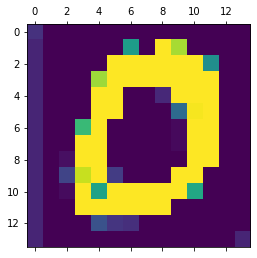

layer:act_layer2 :heatrmap for an image of label 0 with model MNIST_Stochastic_ST_first_conv_binary


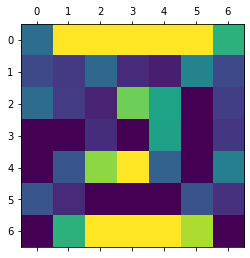

In [0]:
index_data = 10
viz_heatmap(model_binary, name_model, test_loader, index_data)

## Visualization filters trained:

Visualization filters learned for layer: layer1


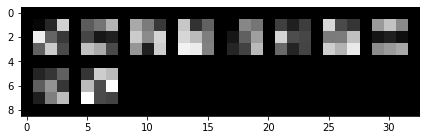

Visualization filters learned for layer: layer2


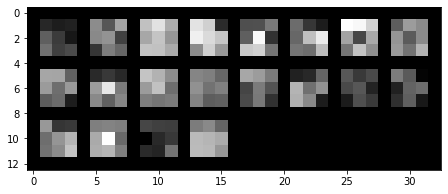

In [0]:
viz_filters(model_no_binary)

Visualization filters learned for layer: layer1


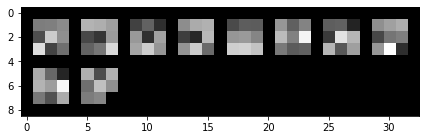

Visualization filters learned for layer: layer2


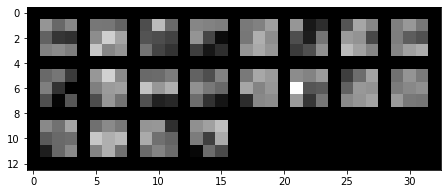

In [0]:
viz_filters(model_binary)

## Visualization image that maximizes a specific activation in a specific layer for a specifc filter:

### Modules:

In [0]:
class GradientAscent:
    """Provides an interface for activation maximization via gradient descent.
    This class implements the gradient ascent algorithm in order to perform
    activation maximization with convolutional neural networks (CNN).
    `Activation maximization <https://pdfs.semanticscholar.org/65d9/94fb778a8d9e0f632659fb33a082949a50d3.pdf>`_
    is one form of feature visualization that allows us to visualize what CNN
    filters are "looking for", by applying each filter to an input image and
    updating the input image so as to maximize the activation of the filter of
    interest (i.e. treating it as a gradient ascent task with activation as the
    loss). The implementation is inspired by `this demo <https://blog.keras.io/category/demo.html>`_
    by Francois Chollet.
    Args:
        model: A neural network model from `torchvision.models
            <https://pytorch.org/docs/stable/torchvision/models.html>`_,
            typically without the fully-connected part of the network.
            e.g. torchvisions.alexnet(pretrained=True).features
        img_size (int, optional, default=224): The size of an input image to be
            optimized.
        lr (float, optional, default=1.): The step size (or learning rate) of
            the gradient ascent.
        use_gpu (bool, optional, default=False): Use GPU if set to True and
            `torch.cuda.is_available()`.
    """

    ####################
    # Public interface #
    ####################

    def __init__(self, model, img_size=28, lr=1., use_gpu=False):
        self.model = model
        self._img_size = img_size
        self._lr = lr
        self._use_gpu = use_gpu

        self.num_layers = len(list(self.model.named_children()))
        self.activation = None
        self.gradients = None

        self.handlers = []

        self.output = None

    @property
    def lr(self):
        return self._lr

    @lr.setter
    def lr(self, lr):
        self._lr = lr

    @property
    def img_size(self):
        return self._img_size

    @img_size.setter
    def img_size(self, img_size):
        self._img_size = img_size

    @property
    def use_gpu(self):
        return self._use_gpu

    @use_gpu.setter
    def use_gpu(self, use_gpu):
        self._use_gpu = use_gpu

    def optimize(self, layer, filter_idx, mean_gradient, ind_x, ind_y, input_=None, num_iter=30):
        """Generates an image that maximally activates the target filter.
        Args:
            layer (torch.nn.modules.conv.Conv2d): The target Conv2d layer from
                which the filter to be chosen, based on `filter_idx`.
            filter_idx (int): The index of the target filter.
            num_iter (int, optional, default=30): The number of iteration for
                the gradient ascent operation.
        Returns:
            output (list of torch.Tensor): With dimentions
                :math:`(num_iter, C, H, W)`. The size of the image is
                determined by `img_size` attribute which defaults to 224.
        """

        # Validate the type of the layer

        if type(layer) != nn.modules.conv.Conv2d:
            raise TypeError('The layer must be nn.modules.conv.Conv2d.')

        # Validate filter index

        num_total_filters = layer.out_channels
        self._validate_filter_idx(num_total_filters, filter_idx)

        # Inisialize input (as noise) if not provided

        if input_ is None:
            input_ = np.uint8(np.random.uniform(
                150, 180, (self._img_size, self._img_size, 1)))
            input_ = apply_transforms(input_, size=self._img_size)

        if torch.cuda.is_available() and self.use_gpu:
            self.model = self.model.to('cuda')
            input_ = input_.to('cuda')

        # Remove previous hooks if any

        while len(self.handlers) > 0:
            self.handlers.pop().remove()

        # Register hooks to record activation and gradients

        self.handlers.append(self._register_forward_hooks(layer, filter_idx, mean_gradient, ind_x, ind_y))
        self.handlers.append(self._register_backward_hooks())

        # Inisialize gradients

        self.gradients = torch.zeros(input_.shape)

        # Optimize

        return self._ascent(input_, num_iter)

    def visualize(self, layer, filter_idxs=None, mean_gradient=True, ind_x=None, ind_y=None,
                  lr=1., num_iter=30,
                  num_subplots=4, figsize=(4, 4), title='Conv2d',
                  return_output=False):
        """Optimizes for the target layer/filter and visualizes the output.
        A method that combines optimization and visualization. There are
        mainly 3 types of operations, given a target layer:
        1. If `filter_idxs` is provided as an integer, it optimizes for the
            filter specified and plots the output.
        2. If `filter_idxs` is provided as a list of integers, it optimizes for
            all the filters specified and plots the output.
        3. if `filter_idx` is not provided, i.e. None, it randomly chooses
            `num_subplots` number of filters from the layer provided and
            plots the output.
        It also returns the output of the optimization, if specified with
        `return_output=True`.
        Args:
            layer (torch.nn.modules.conv.Conv2d): The target Conv2d layer from
                which the filter to be chosen, based on `filter_idx`.
            filter_idxs (int or list of int, optional, default=None): The index
                or indecies of the target filter(s).
            lr (float, optional, default=.1): The step size of optimization.
            num_iter (int, optional, default=30): The number of iteration for
                the gradient ascent operation.
            num_subplots (int, optional, default=4): The number of filters to
                optimize for and visualize. Relevant in case 3 above.
            figsize (tuple, optional, default=(4, 4)): The size of the plot.
                Relevant in case 1 above.
            title (str, optional default='Conv2d'): The title of the plot.
            return_output (bool, optional, default=False): Returns the
                output(s) of optimization if set to True.
        Returns:
            For a single optimization (i.e. case 1 above):
                output (list of torch.Tensor): With dimentions
                    :math:`(num_iter, C, H, W)`. The size of the image is
                    determined by `img_size` attribute which defaults to 224.
            For multiple optimization (i.e. case 2 or 3 above):
                output (list of list of torch.Tensor): With dimentions
                    :math:`(num_subplots, num_iter, C, H, W)`. The size of the
                    image is determined by `img_size` attribute which defaults
                    to 224.
        """

        self._lr = lr
        self.mean_gradient = mean_gradient
        self.ind_x = ind_x
        self.ind_y = ind_y

        if not self.mean_gradient:
          assert self.ind_x != None and self.ind_y != None, 'if mean_gradient is false, you must choice x and y index'


        if (type(filter_idxs) == int):
            output = self._visualize_filter(layer,
                                            filter_idxs,
                                            self.mean_gradient,
                                            self.ind_x,
                                            self.ind_y,
                                            num_iter=num_iter,
                                            figsize=figsize,
                                            title=title)
        else:
            num_total_filters = layer.out_channels

            if filter_idxs is None:
                num_subplots = min(num_total_filters, num_subplots)
                filter_idxs = np.random.choice(range(num_total_filters),
                                               size=num_subplots)

            self._visualize_filters(layer,
                                    filter_idxs,
                                    self.mean_gradient,
                                    self.ind_x,
                                    self.ind_y,
                                    num_iter,
                                    len(filter_idxs),
                                    title=title)

        if return_output:
            return self.output

    #####################
    # Private interface #
    #####################

    def _register_forward_hooks(self, layer, filter_idx, mean_gradient, ind_x, ind_y):
          def _record_activation(module, input_, output):
              if mean_gradient:
                  # maximization of mean for filter_idx
                  self.activation = torch.mean(output[:,filter_idx,:,:])
              else:
                  # maximization of a specific neuron for filter_idx
                  self.activation = output[:,filter_idx,ind_x,ind_y]
          return layer.register_forward_hook(_record_activation)

    def _register_backward_hooks(self):
        def _record_gradients(module, grad_in, grad_out):
            if self.gradients.shape == grad_in[0].shape:
                self.gradients = grad_in[0]

        for _, module in self.model.named_modules():
            if isinstance(module, nn.modules.conv.Conv2d) and \
                    module.in_channels == 1:
                return module.register_backward_hook(_record_gradients)

    def _ascent(self, x, num_iter):
        output = []

        for i in range(num_iter):
            self.model(x)
            self.activation.backward()
            self.gradients /= (torch.sqrt(torch.mean(
                torch.mul(self.gradients, self.gradients))) + 1e-5)
            x = x + self.gradients * self._lr
            output.append(x)
            # TODO: regarder loss et acc pour voir si ça fonctionne

        return output

    def _validate_filter_idx(self, num_filters, filter_idx):
        if not np.issubdtype(type(filter_idx), np.integer):
            raise TypeError('Indecies must be integers.')
        elif (filter_idx < 0) or (filter_idx > num_filters):
            raise ValueError(f'Filter index must be between 0 and {num_filters - 1}.')

    def _visualize_filter(self, layer, filter_idx, mean_gradient, ind_x, ind_y, num_iter, figsize, title):
        self.output = self.optimize(layer, filter_idx, mean_gradient, ind_x, ind_y, num_iter=num_iter)
        
        plt.figure(figsize=figsize)
        plt.axis('off')
        plt.title(title)
        
        plt.imshow(format_for_plotting(
            standardize_and_clip(self.output[-1],
                                 saturation=0.15,
                                 brightness=0.7)), cmap='gray');
    
        plt.show()
        # plt.imsave('plot_image_maximize_filter_layer2_model_MNIST.png')

    def _visualize_filters(self, layer, filter_idxs, mean_gradient, ind_x, ind_y, num_iter, num_subplots,
                           title):
        # Prepare the main plot

        num_cols = 4
        num_rows = int(np.ceil(num_subplots / num_cols))

        fig = plt.figure(figsize=(16, num_rows * 5))
        plt.title(title)
        plt.axis('off')
        

        self.output = []

        # Plot subplots
        for i, filter_idx in enumerate(filter_idxs):
            output = self.optimize(layer, filter_idx, mean_gradient, ind_x, ind_y, num_iter=num_iter)

            self.output.append(output)

            ax = fig.add_subplot(num_rows, num_cols, i+1)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(f'filter {filter_idx}')

            
            ax.imshow(format_for_plotting(
                standardize_and_clip(output[-1],
                                     saturation=0.15,
                                     brightness=0.7)), cmap='gray')
        plt.subplots_adjust(wspace=0, hspace=0);
        # plt.imsave('plot_image_maximize_filter_layer2_model_MNIST.png')

### No binary model:

In [0]:
g_ascent_no_binary = GradientAscent(model_no_binary)
g_ascent_no_binary.use_gpu = True

In [0]:
conv1_no_binary = model_no_binary.layer1
conv1_filters_no_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = False
ind_x_layer1 = 14
ind_y_layer1 = 14

conv2_no_binary = model_no_binary.layer2
conv2_filters_no_binary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
mean_gradient_layer2 = False
ind_x_layer2 = 6
ind_y_layer2 = 6

In [0]:
g_ascent_no_binary.visualize(conv1_no_binary, conv1_filters_no_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, title='No binary model: conv layer 1')
g_ascent_no_binary.visualize(conv2_no_binary, conv2_filters_no_binary, mean_gradient_layer2,
                             ind_x_layer2, ind_y_layer2, title='No binary model: conv layer 2')

### Binary model:

In [0]:
g_ascent_binary = GradientAscent(model_binary)
g_ascent_binary.use_gpu = True

In [0]:
conv1_binary = model_binary.layer1
conv1_filters_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = False
ind_x_layer1 = 14
ind_y_layer1 = 14

conv2_binary = model_binary.layer2
conv2_filters_binary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
mean_gradient_layer2 = False
ind_x_layer2 = 6
ind_y_layer2 = 6

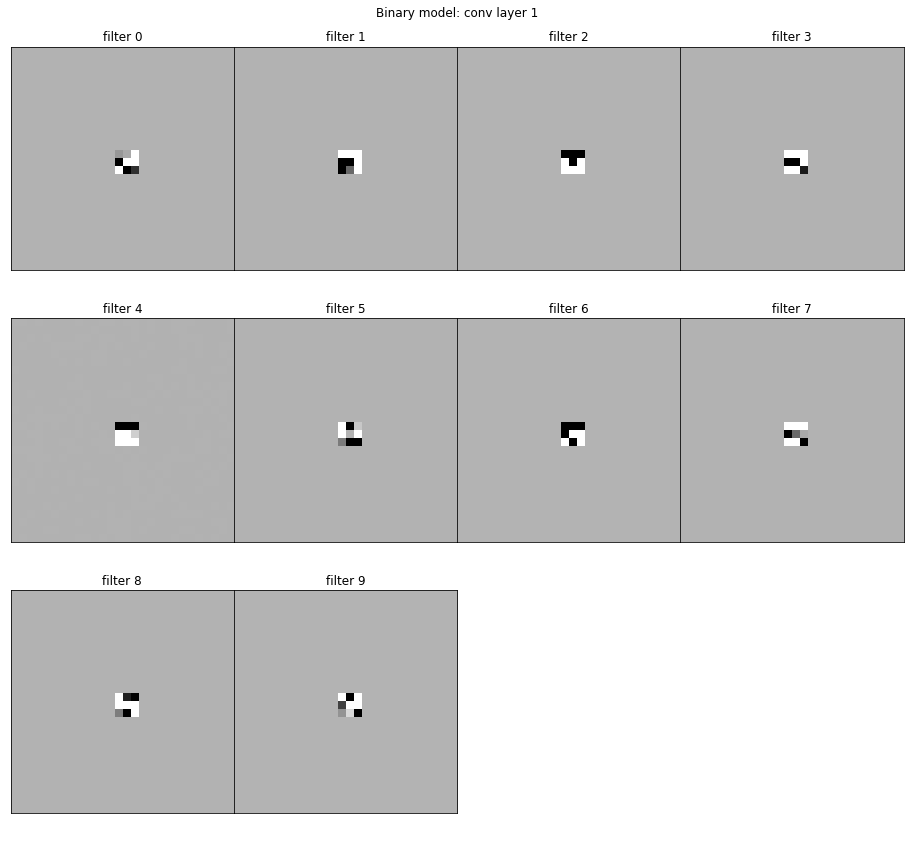

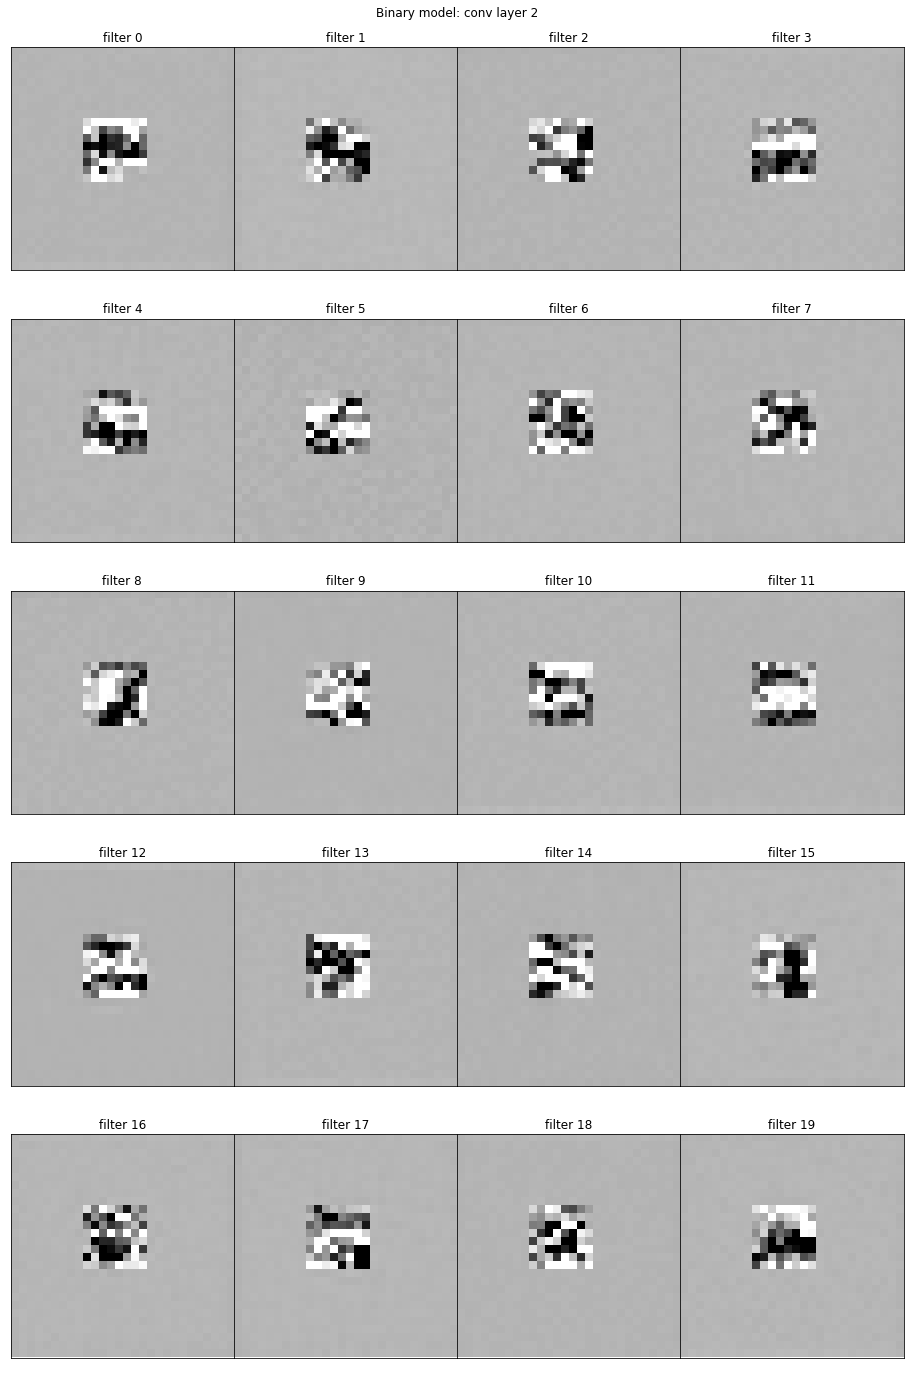

In [0]:
g_ascent_binary.visualize(conv1_binary, conv1_filters_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, title='Binary model: conv layer 1')
g_ascent_binary.visualize(conv2_binary, conv2_filters_binary, mean_gradient_layer2,
                             ind_x_layer2, ind_y_layer2, title='Binary model: conv layer 2')

## Visuazation regions that maximizes a specific layer and filter:

### Modules: